In [5]:
# 라이브러리 준비하기
import csv
import requests
from bs4 import BeautifulSoup
# 패키지 임포트
import numpy as np # Numpy(넘파이) 패키지 임포트
import pandas as pd # pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt # Matplotlib(맷플롯립) 패키지의 pyplot 모듈을 plt로 임포트
from matplotlib import rcParams # 한글 환경 설정을 위한 rcParams 임포트
import seaborn as sns # Seaborn(씨본) 패키지 임포트
import warnings

In [86]:
filename = "셜록 시즌 정보.csv"
f = open(filename, "w", encoding="utf-8-sig", newline="")
writer = csv.writer(f)

##attributes = ["시즌", "제목", "리뷰수", "평점"]
attributes = ["season", "title", "review", "rate"]
writer.writerow(attributes)

# 시즌 1부터 시즌 4까지 url 중 숫자 부분만 바꿔서 반복문으로 가져오기
for season in range(1, 5): 
  url ="https://www.imdb.com/title/tt1475582/episodes?season={}".format(season)
  res = requests.get(url)
  res.raise_for_status()

  soup = BeautifulSoup(res.text, "lxml") 

  season = soup.find("h3", {"id": "episode_top"}).get_text()[-1] 
  episodes = soup.find_all("div", attrs={"itemprop": "episodes"})

  for episode in episodes:
    title = episode.find("a", attrs={"itemprop": "name"}).get_text()
    review = episode.find("span", attrs={"class": "ipl-rating-star__total-votes"}).get_text()[1:-1]
    rate = episode.find("span", attrs={"class": "ipl-rating-star__rating"}).get_text()
    
    data_rows = [season, title, review, rate]
    print(f"season: {season}") ##  시즌 
    print(f"title: {title}")   ## 제목 
    print(f"review: {review}") ## 리뷰 
    print(f"rate: {rate}")     ## 평점 
    print("-"*30)
    writer.writerow(data_rows)

season: 1
title: Unaired Pilot
review: 11,642
rate: 8.7
------------------------------
season: 1
title: A Study in Pink
review: 31,982
rate: 8.9
------------------------------
season: 1
title: The Blind Banker
review: 27,599
rate: 7.9
------------------------------
season: 1
title: The Great Game
review: 28,192
rate: 9.0
------------------------------
season: 2
title: A Scandal in Belgravia
review: 40,034
rate: 9.4
------------------------------
season: 2
title: The Hounds of Baskerville
review: 26,711
rate: 8.3
------------------------------
season: 2
title: The Reichenbach Fall
review: 39,144
rate: 9.6
------------------------------
season: 3
title: Many Happy Returns
review: 11,862
rate: 8.4
------------------------------
season: 3
title: The Empty Hearse
review: 30,823
rate: 8.8
------------------------------
season: 3
title: The Sign of Three
review: 27,744
rate: 8.9
------------------------------
season: 3
title: His Last Vow
review: 30,857
rate: 9.2
-----------------------------

In [56]:
# 한글 환경 설정
def setting_styles_basic():
  rcParams['font.family'] = 'Malgun Gothic' # Windows
  # rcParams['font.family'] = 'AppleGothic' # Mac
  rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 기호가 깨지는 현상 방지

setting_styles_basic()

# 경고창 무시
warnings.filterwarnings('ignore')

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',   # 매체: paper, talk, poster
              style='darkgrid',     # 기본 내장 테마
              palette='deep',       # 그래프 색
              font='Malgun Gothic', # 글꼴 종류 
              font_scale=1,         # 글꼴 크기
              rc=custom_params)     # 그래프 세부 사항

In [87]:
df = pd.read_csv('셜록 시즌 정보.csv')

In [69]:
#sns.get_dataset_names() 

In [88]:
df.shape # DataFrame의 열과 행의 개수 출력하기
#df.head() # DataFrame의 첫 부분 출력하기
df

,season,title,review,rate
0,1,Unaired Pilot,"11,642",8.7
1,1,A Study in Pink,"31,982",8.9
2,1,The Blind Banker,"27,599",7.9
3,1,The Great Game,"28,192",9.0
4,2,A Scandal in Belgravia,"40,034",9.4
5,2,The Hounds of Baskerville,"26,711",8.3
6,2,The Reichenbach Fall,"39,144",9.6
7,3,Many Happy Returns,"11,862",8.4
8,3,The Empty Hearse,"30,823",8.8
9,3,The Sign of Three,"27,744",8.9


<Axes: xlabel='season', ylabel='rate'>

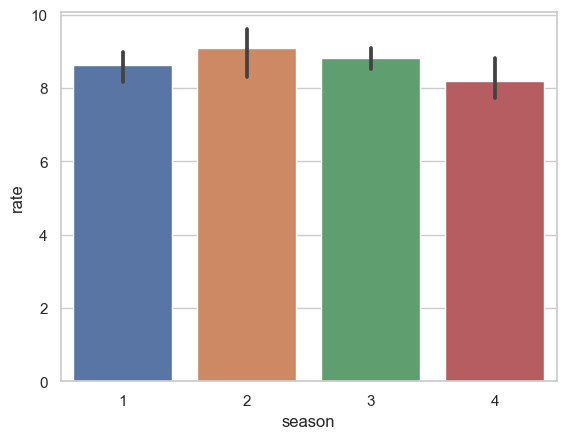

In [93]:
sns.set_theme(style="whitegrid")
sns.barplot(x="season",y="rate",data = df)  # 코드1